In [9]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from __future__ import print_function
%matplotlib inline
from matplotlib import colors as c
fs=20
font={'family' : 'serif', 'size' : fs}  #define font for legend\\n\",\n",
plt.rc('font', **font)

In [10]:
import sys
climber_path='/home/peter/PIK/climber/'#/home/peter/PIK/climber
sys.path.append(climber_path+"data_preparation/future/")
from only_create_P_hum_file_future_homogeneous import r, regions
from only_create_P_hum_file_future_homogeneous import get_lat_lon_agg_ssp
from only_create_P_hum_file_future_homogeneous import get_Energy
from only_create_P_hum_file_future_homogeneous import get_climber_grid
from only_create_P_hum_file_future_homogeneous import area_lon
from only_create_P_hum_file_future_homogeneous import get_g
from only_create_P_hum_file_future_homogeneous import *

In [11]:
years, E=get_Energy(climber_path=climber_path)
full_years=np.squeeze(range(int(years[0]), int(years[-1])+1))

grid=get_climber_grid(climber_path=climber_path)
#Note: This complicated meshgrid definition is because the dimension of x and y needs to be one bigger than lats, lons plotted (boundaries)
#X,Y=np.meshgrid(np.append(data.xt_i, 360+(data.xt_i[1]-data.xt_i[0])/2),np.append(data.yt_j, 90+(data.yt_j[1]-data.yt_j[0])/2))
X,Y=np.meshgrid(np.insert(grid.xu_i, 0, 0.), grid.yu_j)


In [12]:
growth_rate_yearly=get_g(years, full_years, E)
e={}
for reg in r:
    e[reg]=np.zeros([int(years[-1]-years[0]+1)])
    e[reg][0]=E[reg][0]
    for i in range(0,len(full_years)-1):
        e[reg][i+1]=e[reg][i]*growth_rate_yearly[reg][i]

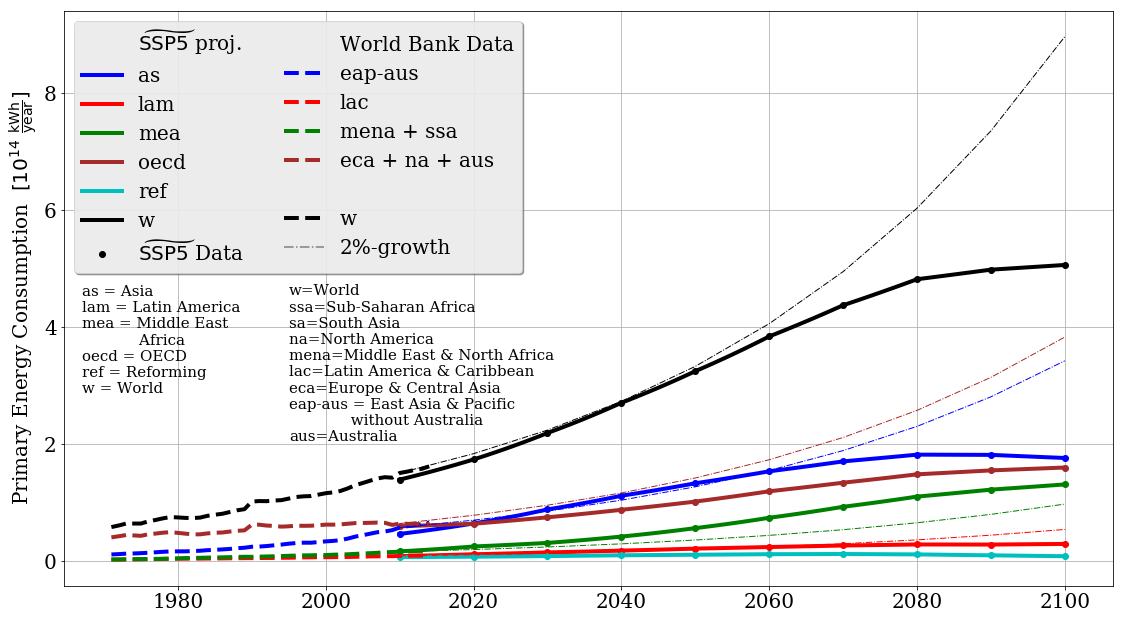

In [14]:
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
#r=["as", "lam", "mea", "oecd", "ref", "w"]
col={"as":'b',"lam": 'r', "mea":'g', "oecd":'brown', "ref":'c', "w":'k'}
ax.plot([], [], ' ', label=r'${\rm \widetilde{SSP5}}$ proj.')
for n,reg in enumerate(r):
    ax.plot(full_years, 10**(-14)*e[reg], lw=4, label=reg, color=col[reg])
    ax.plot(years, 10**(-14)*E[reg], 'o', color=col[reg])
#    ax.plot(years[1:], E[reg][:-1]*growth_rate[reg]**(np.diff(years)), 'x', color=c[reg])
ax.plot([],[], 'o', color=col['w'], label=r'${\rm \widetilde{SSP5}}$ Data')
    #plt.plot(years, E[reg], '--', color='grey', alpha=0.6, lw=3)
    
sys.path.append(climber_path+"data_preparation/PMIP/P_hum")
from only_create_P_hum_file_script_homogeneous import get_Energy
from only_create_P_hum_file_script_homogeneous import get_P_map_year
from only_create_P_hum_file_script_homogeneous import regions as regions_old
from only_create_P_hum_file_script_homogeneous import r as r_old
years_old, perc_old, E_tot, tot_E_sum, forgotten_islands_factor=get_Energy(climber_path=climber_path)

#from only_create_P_hum_file_script import r as r_old
start_year=np.where(years_old==1971)[0][0]

ax.plot([], [], ' ', label='World Bank Data')
reg2='eap-aus'
reg22='sa'
a=reg2+" + "+reg22
ax.plot(years_old[start_year:], 10**(-14)*(E_tot[reg2][start_year:]+E_tot[reg22][start_year:]), '--',lw=4, label=reg2, color=col['as'])
reg2='lac'
ax.plot(years_old[start_year:], 10**(-14)*E_tot[reg2][start_year:], '--',lw=4, label=reg2, color=col['lam'])
reg2='mena'
reg22='ssa'
a=reg2+" + "+reg22
ax.plot(years_old[start_year:], 10**(-14)*(E_tot[reg2][start_year:]+ E_tot[reg22][start_year:]), '--',lw=4, label=a, color=col['mea'])
reg2='eca'
reg22='na'
reg23='aus'
a=reg2+" + "+reg22+" + "+reg23
ax.plot(
    years_old[start_year:], 10**(-14)*(E_tot[reg2][start_year:]+E_tot[reg22][start_year:]+E_tot[reg23][start_year:]), 
    '--',lw=4, label=a, color=col['oecd'])
ax.plot([], [], ' ', label=' ')
reg2='w'
ax.plot(years_old[start_year:], 10**(-14)*E_tot[reg2][start_year:], '--',lw=4, label=reg2, color=col['w'])

ax.plot([], [], '-.', label='2%-growth', color='grey')
######################################
#Plot a 2% growth scenario
t_ind=np.where(years_old==2010)[0][0]
reg2='eap-aus'
reg22='sa'
a=reg2+" + "+reg22
ax.plot(years[:], 10**(-14)*(E_tot[reg2][t_ind]+E_tot[reg22][t_ind])*1.02**(years[:]-2010), '-.',lw=1, color=col['as'])
reg2='lac'
ax.plot(years[:], 10**(-14)*(E_tot[reg2][t_ind])*1.02**(years[:]-2010), '-.',lw=1, color=col['lam'])
reg2='mena'
reg22='ssa'
a=reg2+" + "+reg22
ax.plot(years[:], 10**(-14)*(E_tot[reg2][t_ind]+ E_tot[reg22][t_ind])*1.02**(years[:]-2010), '-.',lw=1,color=col['mea'])
reg2='eca'
reg22='na'
reg23='aus'
a=reg2+" + "+reg22+" + "+reg23
ax.plot(years[:], 10**(-14)*(E_tot[reg2][t_ind]+E_tot[reg22][t_ind]+E_tot[reg23][t_ind])*1.02**(years[:]-2010), 
    '-.',lw=1, color=col['oecd'])
#ax.plot([], [], ' ', label=' ')
reg2='w'
ax.plot(years[0:], 10**(-14)*(E_tot[reg2][t_ind])*1.02**(years[0:]-2010), 
        '-.',lw=1, color=col['w'])
###################################


ax.legend(shadow=True, ncol=2)
ax.grid()
#ax.set_xlabel("Years")
ax.set_ylabel(r"Primary Energy Consumption  $ [10^{14} \ \frac{\rm kWh}{\rm year}]$")
legende2=""
legende3=""
for n,u in enumerate(regions):
    if r[n]=='mea':
         legende2+="mea"+" = "+"Middle East"+"\n"+"            Africa"+"\n"
    else:
        legende2+=r[n]+" = "+u+"\n"
#legende2+="------------\n"
for n,u in enumerate(regions_old):
    if r_old[n]=='eap-aus':
         legende3+="eap-aus"+" = "+"East Asia & Pacific"+"\n"+"             without Australia"+"\n"
    else:
        legende3+=r_old[n]+"="+u+"\n"
ax.text(1967, 2.6, legende2, fontsize=15)
ax.text(1995, 1.78, legende3, fontsize=15)
fig.tight_layout()
plt.savefig("comparison_E(reg)_SSP5-vs-WorldBank.eps", format='eps', bbox_inches='tight')